Let's compare the performance of logistic regression, decision tree, AdaBoost, gradient boosting, and random forest classification with the white wine dataset in the UCI ML repository. Go to the link [here](https://archive.ics.uci.edu/dataset/186/wine+quality) for more details about this dataset

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
warnings.filterwarnings("ignore")

In [3]:
dataset = pd.read_csv("./datasets/winequality-white.csv", sep=";")
display(dataset.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
None


In [5]:
display(dataset.drop("quality", axis=1).describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000


According to above statistical description, it can be clearly see that there are exist some outliers.

In [6]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
iqr_threshold = 2

In [7]:
lower_bound = Q1 - iqr_threshold * IQR
upper_bound = Q3 + iqr_threshold * IQR

outliers_count = ((dataset < lower_bound) | (dataset > upper_bound)).sum()

print("Number of outliers in each column:")
print(outliers_count)

Number of outliers in each column:
fixed acidity            46
volatile acidity        118
citric acid             159
residual sugar            3
chlorides               172
free sulfur dioxide      26
total sulfur dioxide      7
density                   3
pH                       27
sulphates                48
alcohol                   0
quality                   5
dtype: int64


In [8]:
# remove outliers
outlier_rows = ((dataset < (lower_bound)) | (dataset > (upper_bound))).any(axis=1)
dataset = dataset[~outlier_rows]

In [9]:
display(dataset.drop("quality", axis=1).describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000,4364.000000
mean,6.840158,0.267852,0.326425,6.408261,0.042465,35.002750,137.624427,0.993938,3.189015,0.485587,10.560013
std,0.785048,0.081475,0.093742,4.986459,0.010207,15.517245,41.477168,0.002917,0.142988,0.105936,1.219272
min,4.400000,0.080000,0.040000,0.600000,0.012000,2.000000,19.000000,0.987110,2.790000,0.220000,8.000000
25%,6.300000,0.210000,0.270000,1.700000,0.035000,24.000000,108.000000,0.991640,3.090000,0.410000,9.500000
50%,6.800000,0.260000,0.310000,5.200000,0.042000,34.000000,133.000000,0.993620,3.180000,0.470000,10.400000
75%,7.300000,0.320000,0.380000,9.900000,0.049000,45.000000,167.000000,0.996000,3.280000,0.540000,11.400000
max,9.300000,0.540000,0.630000,26.050000,0.078000,89.000000,272.000000,1.002950,3.650000,0.830000,14.200000


In [10]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4364 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4364 non-null   float64
 1   volatile acidity      4364 non-null   float64
 2   citric acid           4364 non-null   float64
 3   residual sugar        4364 non-null   float64
 4   chlorides             4364 non-null   float64
 5   free sulfur dioxide   4364 non-null   float64
 6   total sulfur dioxide  4364 non-null   float64
 7   density               4364 non-null   float64
 8   pH                    4364 non-null   float64
 9   sulphates             4364 non-null   float64
 10  alcohol               4364 non-null   float64
 11  quality               4364 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 443.2 KB
None


In [11]:
X = dataset.drop("quality", axis=1)
y = dataset["quality"]

In [12]:
scalar = StandardScaler()

# Standardize features
X = scalar.fit_transform(X, y)
X.shape

(4364, 11)

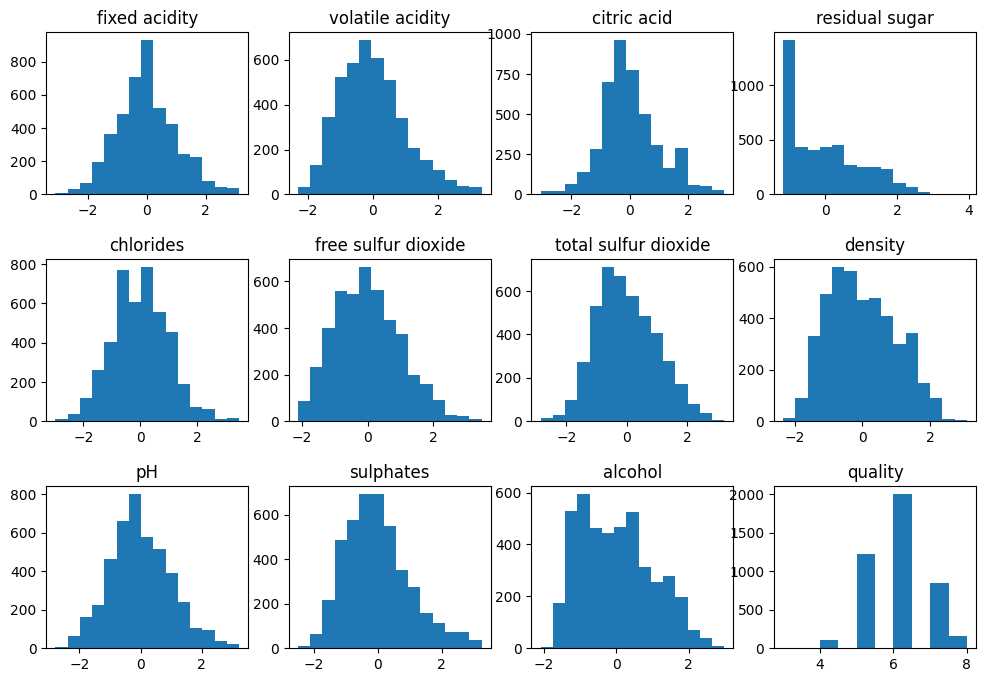

In [13]:
plt.figure(figsize=(12, 8))
for i, (title, data) in enumerate(zip(dataset.columns[:-1], X.T)):
    plt.subplot(3, 4, i+1)
    plt.hist(data, bins=15)
    plt.title(title)
plt.subplot(3, 4, 12)
plt.hist(y)
plt.title("quality")
plt.subplots_adjust(hspace=0.4)
plt.show()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Logistic Regression

In [15]:
logistic_reg = LogisticRegression(penalty="l2", solver="newton-cg", multi_class="ovr", max_iter=1000)

logistic_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, multi_class='ovr', solver='newton-cg')

In [16]:
print(f"Train score = {logistic_reg.score(X_train, y_train):.4f}")
print(f"Test score = {logistic_reg.score(X_test, y_test):.4f}")

Train score = 0.5534
Test score = 0.5168


In [17]:
print(X_train.shape)
print(X_test.shape)

(3054, 11)
(1310, 11)


In [18]:
# apply k-fold cross validation to check the performance (overfitting) of logistic regression.

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(logistic_reg, X_train, y_train, cv=kf)

array([0.53846154, 0.5188216 , 0.54991817, 0.61865794, 0.5147541 ])

In [19]:
y_pred = logistic_reg.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           3        nan      0.00      0.00         4
           4        nan      0.00      0.00        43
           5       0.54      0.48      0.51       376
           6       0.51      0.74      0.60       599
           7       0.53      0.23      0.32       235
           8        nan      0.00      0.00        53

    accuracy                           0.52      1310
   macro avg       0.53      0.24      0.24      1310
weighted avg       0.52      0.52      0.48      1310



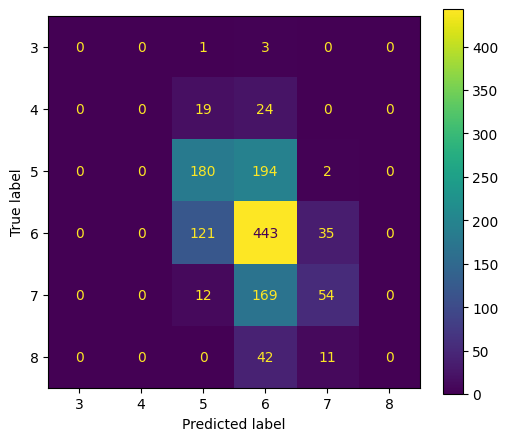

In [20]:
labels = np.sort(y.unique())

cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
disp.figure_.set_size_inches(w=6, h=5)

#### Decision Tree

In [15]:
decision_tree = DecisionTreeClassifier(criterion="entropy")

decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [16]:
print(f"Train score = {decision_tree.score(X_train, y_train):.4f}")
print(f"Test score = {decision_tree.score(X_test, y_test):.4f}")

Train score = 1.0000
Test score = 0.5908


In [17]:
# apply k-fold cross validation to check the performance (overfitting) of decision tree.

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(decision_tree, X_train, y_train, cv=kf)

array([0.56301146, 0.56464812, 0.54664484, 0.57610475, 0.59836066])

In [18]:
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.27      0.19      0.22        43
           5       0.60      0.56      0.58       376
           6       0.65      0.66      0.65       599
           7       0.54      0.58      0.56       235
           8       0.38      0.43      0.40        53

    accuracy                           0.59      1310
   macro avg       0.40      0.40      0.40      1310
weighted avg       0.59      0.59      0.59      1310



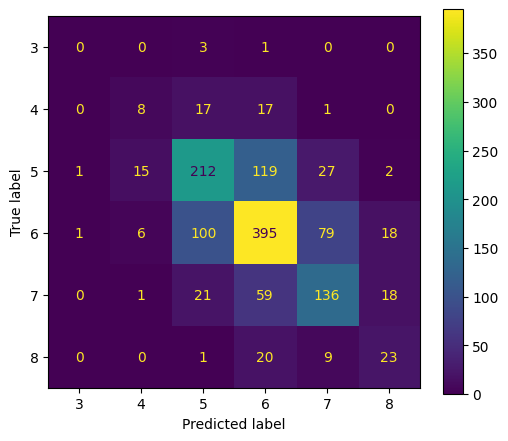

In [19]:
labels = np.sort(y.unique())

cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
disp.figure_.set_size_inches(w=6, h=5)

#### AdaBoost

In [15]:
adaboost = AdaBoostClassifier(n_estimators=50, learning_rate=1)

adaboost.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [16]:
print(f"Train score = {adaboost.score(X_train, y_train):.4f}")
print(f"Test score = {adaboost.score(X_test, y_test):.4f}")

Train score = 0.4257
Test score = 0.3939


In [17]:
# apply k-fold cross validation to check the performance (overfitting) of AdaBoost.

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(adaboost, X_train, y_train, cv=kf)

array([0.36497545, 0.41080196, 0.43698854, 0.41080196, 0.2704918 ])

In [18]:
y_pred = adaboost.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.12      0.28      0.17        43
           5       0.45      0.27      0.34       376
           6       0.46      0.58      0.52       599
           7       0.30      0.22      0.26       235
           8       0.03      0.04      0.04        53

    accuracy                           0.39      1310
   macro avg       0.23      0.23      0.22      1310
weighted avg       0.40      0.39      0.39      1310



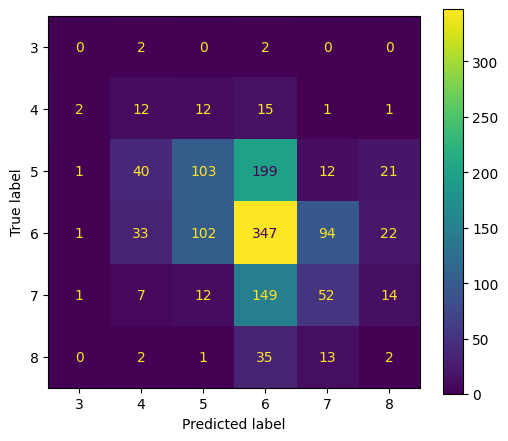

In [19]:
labels = np.sort(y.unique())

cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
disp.figure_.set_size_inches(w=6, h=5)

#### Gradient Boosting

In [15]:
gradient_boost = GradientBoostingClassifier()

gradient_boost.fit(X_train, y_train)

GradientBoostingClassifier()

In [16]:
print(f"Train score = {gradient_boost.score(X_train, y_train):.4f}")
print(f"Test score = {gradient_boost.score(X_test, y_test):.4f}")

Train score = 0.7590
Test score = 0.5756


In [17]:
# apply k-fold cross validation to check the performance (overfitting) of Gradient Boosting.

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(gradient_boost, X_train, y_train, cv=kf)

array([0.60392799, 0.58265139, 0.58265139, 0.59738134, 0.62131148])

In [18]:
y_pred = gradient_boost.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.27      0.07      0.11        43
           5       0.59      0.57      0.58       376
           6       0.58      0.71      0.64       599
           7       0.57      0.41      0.48       235
           8       0.61      0.21      0.31        53

    accuracy                           0.58      1310
   macro avg       0.44      0.33      0.35      1310
weighted avg       0.57      0.58      0.56      1310



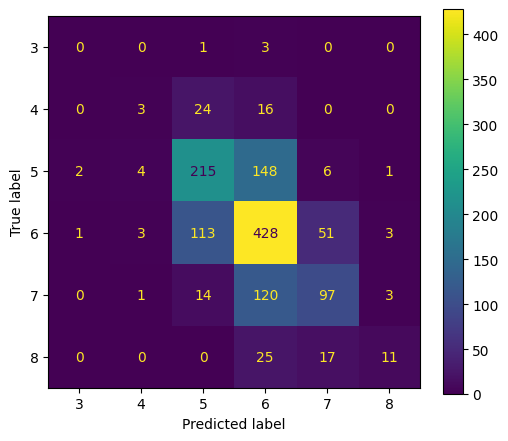

In [19]:
labels = np.sort(y.unique())

cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
disp.figure_.set_size_inches(w=6, h=5)

#### Random Forest

In [15]:
random_forest = RandomForestClassifier(criterion="entropy")

random_forest.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

In [16]:
print(f"Train score = {random_forest.score(X_train, y_train):.4f}")
print(f"Test score = {random_forest.score(X_test, y_test):.4f}")

Train score = 1.0000
Test score = 0.6733


In [17]:
# apply k-fold cross validation to check the performance (overfitting) of Random Forest.

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(random_forest, X_train, y_train, cv=kf)

array([0.64484452, 0.66121113, 0.66448445, 0.66939444, 0.6704918 ])

In [18]:
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           3        nan      0.00      0.00         4
           4       1.00      0.09      0.17        43
           5       0.71      0.66      0.68       376
           6       0.65      0.79      0.71       599
           7       0.69      0.60      0.64       235
           8       0.84      0.30      0.44        53

    accuracy                           0.67      1310
   macro avg       0.78      0.41      0.44      1310
weighted avg       0.69      0.67      0.66      1310



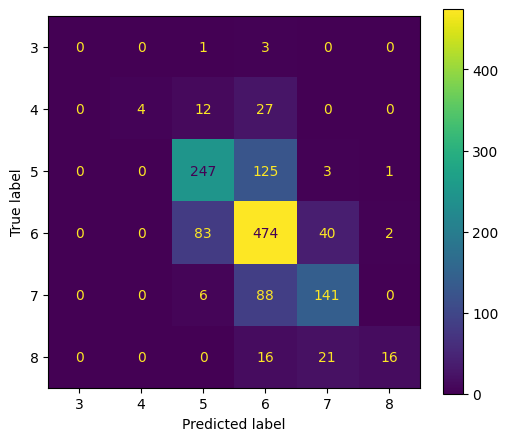

In [19]:
labels = np.sort(y.unique())

cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
disp.figure_.set_size_inches(w=6, h=5)

#### SVC

In [15]:
params = {
    "C": np.arange(0, 7, 1),
    "kernel": ['linear', 'poly', 'rbf', 'sigmoid']
}

In [16]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=params, cv=3, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': array([0, 1, 2, 3, 4, 5, 6]),
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=1)

In [17]:
best_estimator = grid_search.best_estimator_
print(grid_search.best_params_)

print(f"Train score = {best_estimator.score(X_train, y_train):.4f}")
print(f"Test score = {best_estimator.score(X_test, y_test):.4f}")

{'C': 5, 'kernel': 'rbf'}


Train score = 0.7246
Test score = 0.5794


In [18]:
# apply k-fold cross validation to check the performance (overfitting) of SVC.

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(best_estimator, X_train, y_train, cv=kf)

array([0.55319149, 0.57610475, 0.61047463, 0.61702128, 0.59180328])

In [19]:
y_pred = best_estimator.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=np.nan))

              precision    recall  f1-score   support

           3        nan      0.00      0.00         4
           4       0.38      0.07      0.12        43
           5       0.60      0.59      0.60       376
           6       0.58      0.72      0.64       599
           7       0.54      0.42      0.47       235
           8       0.71      0.09      0.17        53

    accuracy                           0.58      1310
   macro avg       0.56      0.32      0.33      1310
weighted avg       0.58      0.58      0.56      1310



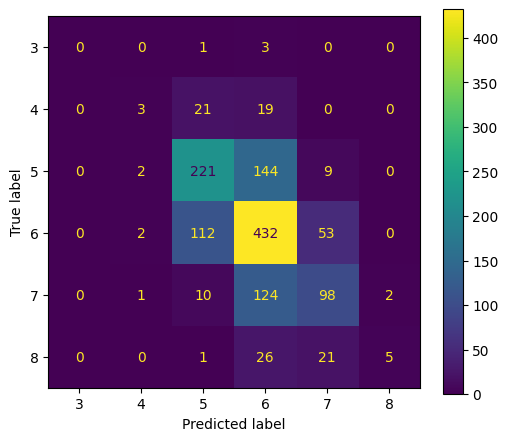

In [20]:
labels = np.sort(y.unique())

cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(cm, display_labels=labels)
disp.plot()
disp.figure_.set_size_inches(w=6, h=5)

According to above results among those classification models with given parameters, Random Forest model performs relatively well. Now let's perform hyperparameter tunning for that model.

In [15]:
params = {
    "n_estimators": np.arange(100, 800, 100),
    "max_features": ["sqrt", "log2"]
}

In [16]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(criterion="entropy"), 
                           param_grid=params, cv=3, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(criterion='entropy'),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': array([100, 200, 300, 400, 500, 600, 700])},
             verbose=1)

In [17]:
best_estimator = grid_search.best_estimator_
print(grid_search.best_params_)

print(f"Train score = {best_estimator.score(X_train, y_train):.4f}")
print(f"Test score = {best_estimator.score(X_test, y_test):.4f}")

{'max_features': 'sqrt', 'n_estimators': 100}
Train score = 1.0000


Test score = 0.6679


In [18]:
# apply k-fold cross validation to check the performance (overfitting) of best_estimator.

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cross_val_score(best_estimator, X_train, y_train, cv=kf)

array([0.65139116, 0.67266776, 0.66448445, 0.67266776, 0.6704918 ])